# Explore here

In [30]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import db_connect
engine = db_connect()

In [32]:

# Me traigo los datos de la url proporcionada y los guardo localmente en mi proyecto
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
df = pd.read_csv(url)
df.to_csv("../data/raw/data.csv", index=False)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [33]:
# Obtener las dimensiones
df.shape

(48895, 16)

In [34]:
# Obtener información sobre tipos de datos y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

- Existen un total de 48895 filas (en este caso, habitaciones o propiedades) y 16 columnas, de entre las que encontramos el objetivo o clase a predecir, `price`.

- Las variables `last_review` y `reviews_per_month` cuentan con valores nulos, pero siguen teniendo una cantidad de datos considerable como para tenerse en cuenta

- El resto de variables cuentan casi siempre todos los valores.

- Los datos cuentan con 10 características numéricas y 6 características categóricas si nos vamos estrictamente al tipo de dato que aparece en el dataset. A pesar de esto, consideraré como categóricas también las características `id` y `host_id`, debido a que no constituyen datos con relación matemática alguna, y sí presentan características de indicadores o etiquetas. Por tanto mi dataset quedaría con:<br>**8 características numéricas y 8 categóricas**

In [35]:
duplicados = df.duplicated(subset=['id'])
num_duplicados = duplicados.sum()
num_duplicados

np.int64(0)

Teniendo en cuenta el ID de cada propiedad, el dataset no presenta valores duplicados.

In [36]:
# Seleccion de atributos relevantes
df_imp = df.drop(["id", "name", "host_id", "host_name", "neighbourhood", "latitude", "longitude", "last_review"], axis = 1)
df_imp

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Private room,150,3,0,NaN,1,365
3,Brooklyn,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...
48890,Brooklyn,Private room,70,2,0,NaN,2,9
48891,Brooklyn,Private room,40,4,0,NaN,2,36
48892,Manhattan,Entire home/apt,115,10,0,NaN,1,27
48893,Manhattan,Shared room,55,1,0,NaN,6,2


En mi selección de atributos relevantes decido excluir de mi dataset las columnas que representan información que no aportará a mi modelo predictivo:  
`id`  
`name`  
`host_id`  
`host_name`  
`latitude`  
`longitude`  
`last_review`  
`neighbourhood`  
Toda esta información tiene carácter descriptivo en mis datos pero no obedece ningún patrón ni puedo tratarla para tomar alguna decisión. Consideré eliminar latitud y longitud porque me aporta más valor el nombre del barrio en que están ubicadas las casas a la hora de agrupar los datos, mientras que las coordenadas serían útiles más bien para hacer una representación en un mapa de los inmuebles.

In [37]:
# Variables categoricas ["neighbourhood_group", "room_type"]
print(df_imp["neighbourhood_group"].value_counts(), "\n")
print(df_imp["room_type"].value_counts(), "\n")

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64 

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64 



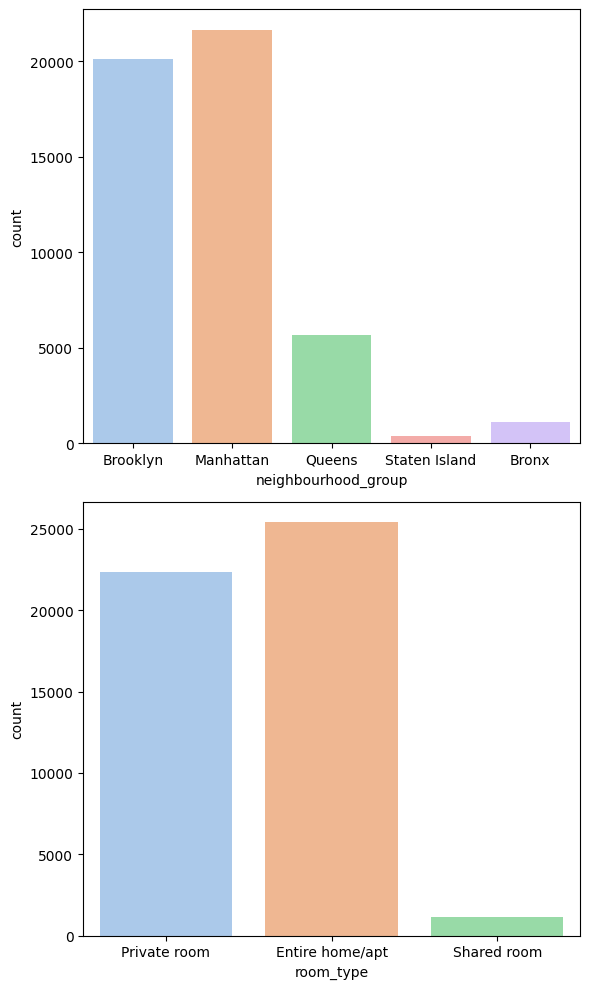

In [38]:
fig, axis = plt.subplots(2, 1, figsize = (6, 10))

sns.countplot(ax = axis[0], data = df_imp, x = "neighbourhood_group", palette='pastel', hue= "neighbourhood_group", legend=False)
sns.countplot(ax = axis[1], data = df_imp, x = "room_type", palette='pastel', hue= "room_type", legend=False)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

• De mis datos en `neighbourhood_group` puedo decir que más de un 80 % de los inmuebles están localizados o en Brooklyn o en Manhattan, siendo Staten Island y el Bronx los menos habituales  
• En cuanto al tipo de habitación, `room_type` se distribuye en más de un 95 % entre Habitaciones Privadas o Pisos, siendo lo menos común las Habitaciones Compartidas

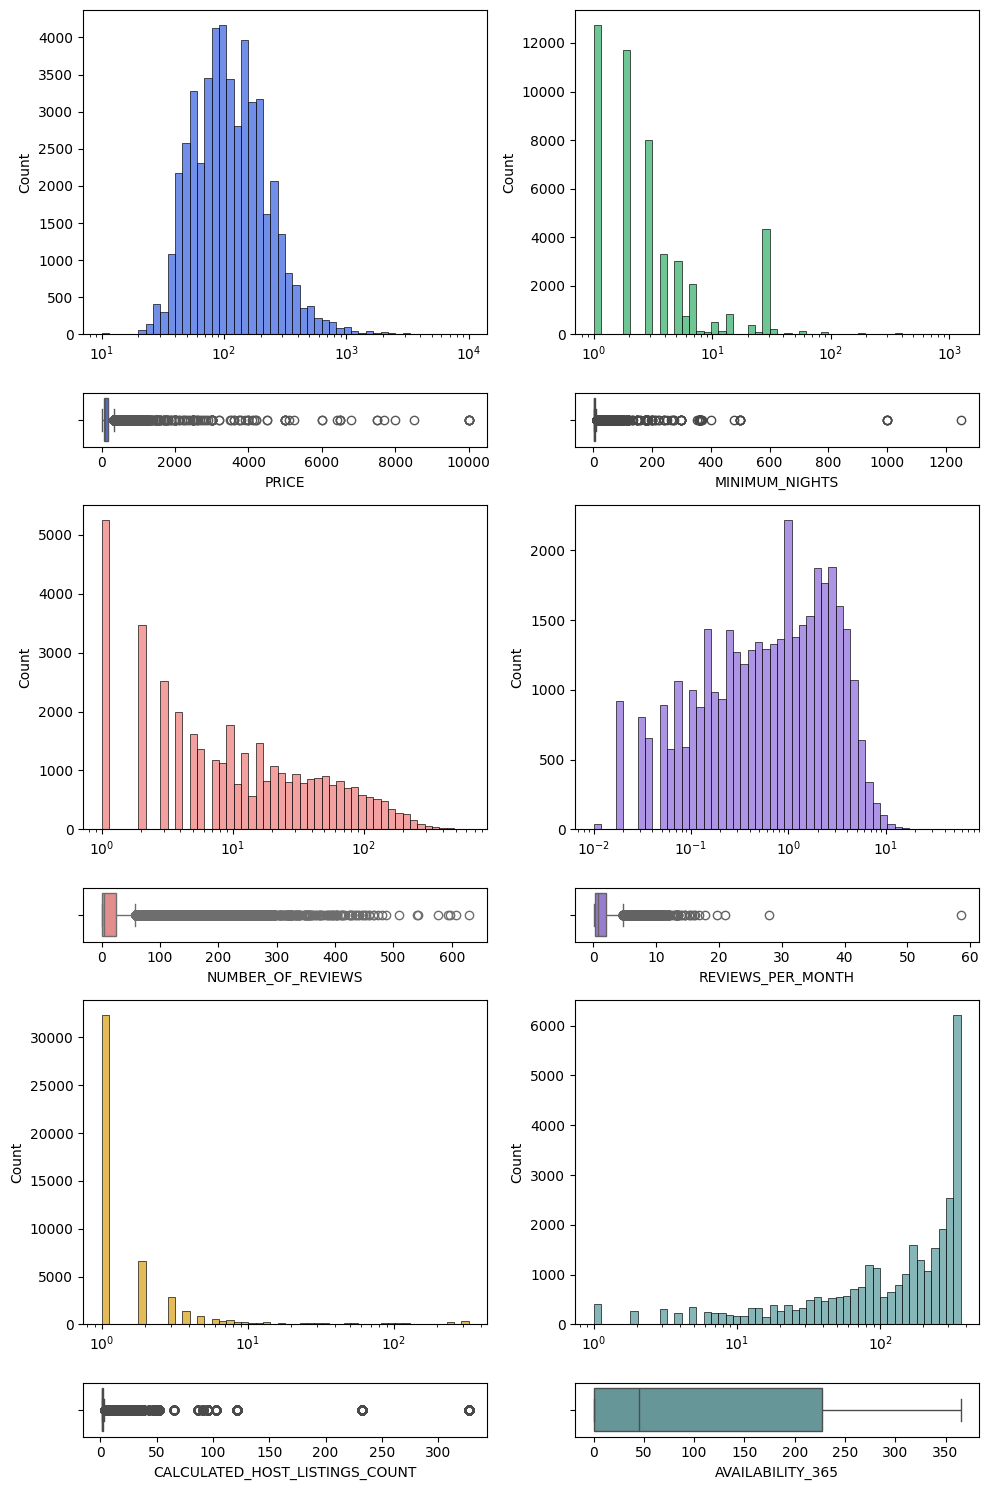

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [39]:
# ANALISIS SOBRE VARIABLES NUMERICAS
# Mis variables numéricas a considerar serían:
# "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count" y "availability_365"

fig, axis = plt.subplots(6, 2, figsize = (10, 15), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
# price
sns.histplot(ax = axis[0, 0], data = df_imp, x = "price", bins=50, log_scale=True, color="royalblue").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df_imp, x = "price", color="royalblue").set(xlabel = "PRICE")

# minimum_nights
sns.histplot(ax = axis[0, 1], data = df_imp, x = "minimum_nights", bins=50, log_scale=True, color="mediumseagreen").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = df_imp, x = "minimum_nights", color="mediumseagreen").set(xlabel = "MINIMUM_NIGHTS")

# number_of_reviews
sns.histplot(ax = axis[2, 0], data = df_imp, x = "number_of_reviews", log_scale=True, bins=50, color="lightcoral").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df_imp, x = "number_of_reviews", color="lightcoral").set(xlabel = "NUMBER_OF_REVIEWS")

# reviews_per_month
sns.histplot(ax = axis[2, 1], data = df_imp, x = "reviews_per_month", log_scale=True, bins=50, color="mediumpurple").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = df_imp, x = "reviews_per_month", color="mediumpurple").set(xlabel = "REVIEWS_PER_MONTH")

# calculated_host_listings_count
sns.histplot(ax = axis[4, 0], data = df_imp, x = "calculated_host_listings_count", log_scale=True, bins=50, color="goldenrod").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = df_imp, x = "calculated_host_listings_count", color="goldenrod").set(xlabel = "CALCULATED_HOST_LISTINGS_COUNT")

# availability_365
sns.histplot(ax = axis[4, 1], data = df_imp, x = "availability_365", log_scale=True, bins=50, color="cadetblue").set(xlabel = None)
sns.boxplot(ax = axis[5, 1], data = df_imp, x = "availability_365", color="cadetblue").set(xlabel = "AVAILABILITY_365")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

df_imp.describe()

**CONCLUSIONES DE ANÁLISIS DE VARIABLES NUMÉRICAS**  
* `price` : Muchos precios extremos por alojamientos caros que distorsionan la media, la mayor cantidad de datos se concentra entre precios de 50 a 180 pero hay valores que llegan hasta los 10000, lo cual pudiera representar propiedades de lujo.  
* `minumum_nights` : La mayoría exige un mínimo de entre 1 y 10 noches, habiendo un pico en 30 lo cual indicaría que un mes es un valor frecuente también, lo cual son datos razonables. Hay presencia de muchos outliers, incluso que llegan hasta mas de 1000 noches, lo cual puede deberse a errores en los datos o alguna estrategia particular del anfitrión.  
* `number_of_reviews` : La mayoría tiene pocas reseñas, aunque hay presencia de muchos outliers también y algunas propiedades que llegan a tener mas de 600 reviews, lo cual pudiera indicar mucha popularidad de estas.  
* `reviews_per_month` : La mayoría de los datos representan unas reseñas mensuales de las propiedades que oscilan entre menos de 1 a 5 mensuales, aunque hay presencia de valores extremos de hasta más de 50.  
* `calculated_host_listings_count` : La mayoría de los propietarios tienen un solo alojamiento, pero hay presencia de algunos que poseen más de 100, pudiera deberse a grandes actores comerciales o empresas con cientos de propiedades.  
* `availability_365` : En cuanto a la disponibilidad anual muchos alojamientos están disponibles los 365 días del año y otros muchos apenas menos de 50 días, hay mucha menor cantidad de outliers que en los anteriores. Hay dos perfiles claros, anfitriones que alquilan a tiempo completo y otros que lo hacen de forma puntual.  

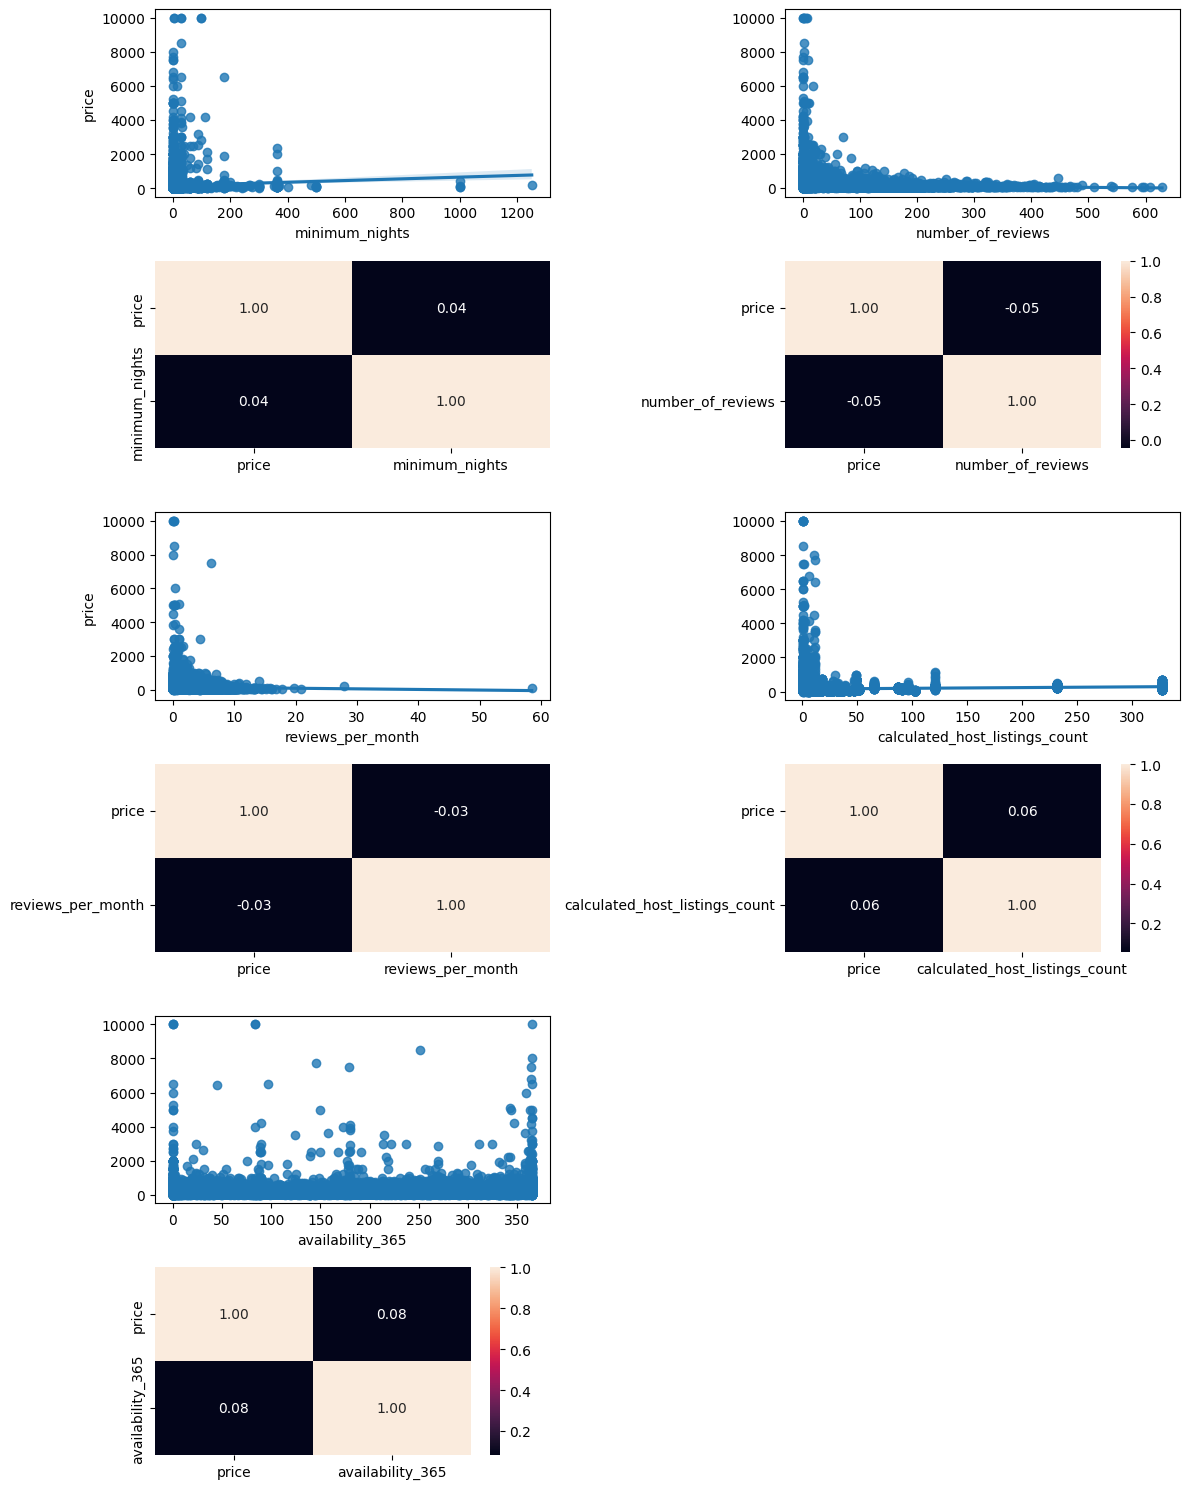

In [40]:
# ANÁLISIS NUMÉRICO - NUMÉRICO BUSCANDO CORRELACIONES ENTRE VARIABLES BUSCANDO RELACIÓN CON MI VARIABLE OBJETIVO "price"
fig, axis = plt.subplots(6, 2, figsize = (12, 15))
# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "minimum_nights", y = "price")
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "number_of_reviews", y = "price").set(ylabel=None)
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "reviews_per_month", y = "price")
sns.heatmap(df[["price", "reviews_per_month"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2, 1], data = df, x = "calculated_host_listings_count", y = "price").set(ylabel=None)
sns.heatmap(df[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

sns.regplot(ax = axis[4, 0], data = df, x = "availability_365", y = "price").set(ylabel=None)
sns.heatmap(df[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 0])

axis[4, 1].axis("off")
axis[5, 1].axis("off")
# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

No existe una correlación entre prácticamente ninguna variable numérica por sí sola con la variable a predecir `price`.

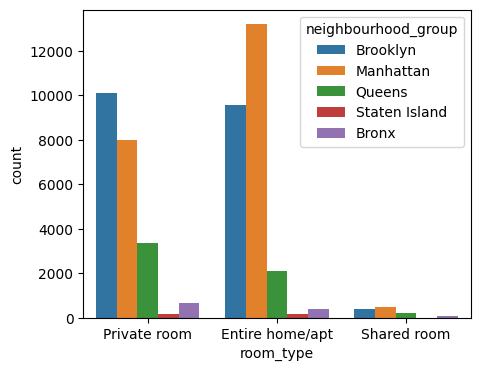

In [41]:
# ANÁLISIS CATEGÓRICO - CATEGÓRICO
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = df_imp, x = "room_type", hue = "neighbourhood_group")

plt.show()

**ANÁLISIS DE TIPO DE ALQUILERES POR LOCALIDAD**
- Brooklyn:  
    - Alta cantidad de Private rooms y Entire homes/apartments.
    - Es el distrito con más Private rooms.
- Manhattan:
    - Es el líder en Entire home/apartment, con más de 13,000 registros.
    - Tiene también una gran cantidad de Private rooms, aunque menos que Brooklyn.
    - Es el distrito con más alojamientos en general.
- Queens:
    - Mucho menor volumen comparado con Brooklyn y Manhattan.
    - Tiene más Private rooms que Entire homes/apts.
- Staten Island:
    - Muy baja presencia en todos los tipos de habitación.
    - Prácticamente insignificante en Shared room.
- Bronx:
    - También baja presencia, aunque destaca más que Staten Island.
    - Private rooms predominan ligeramente sobre los otros tipos.


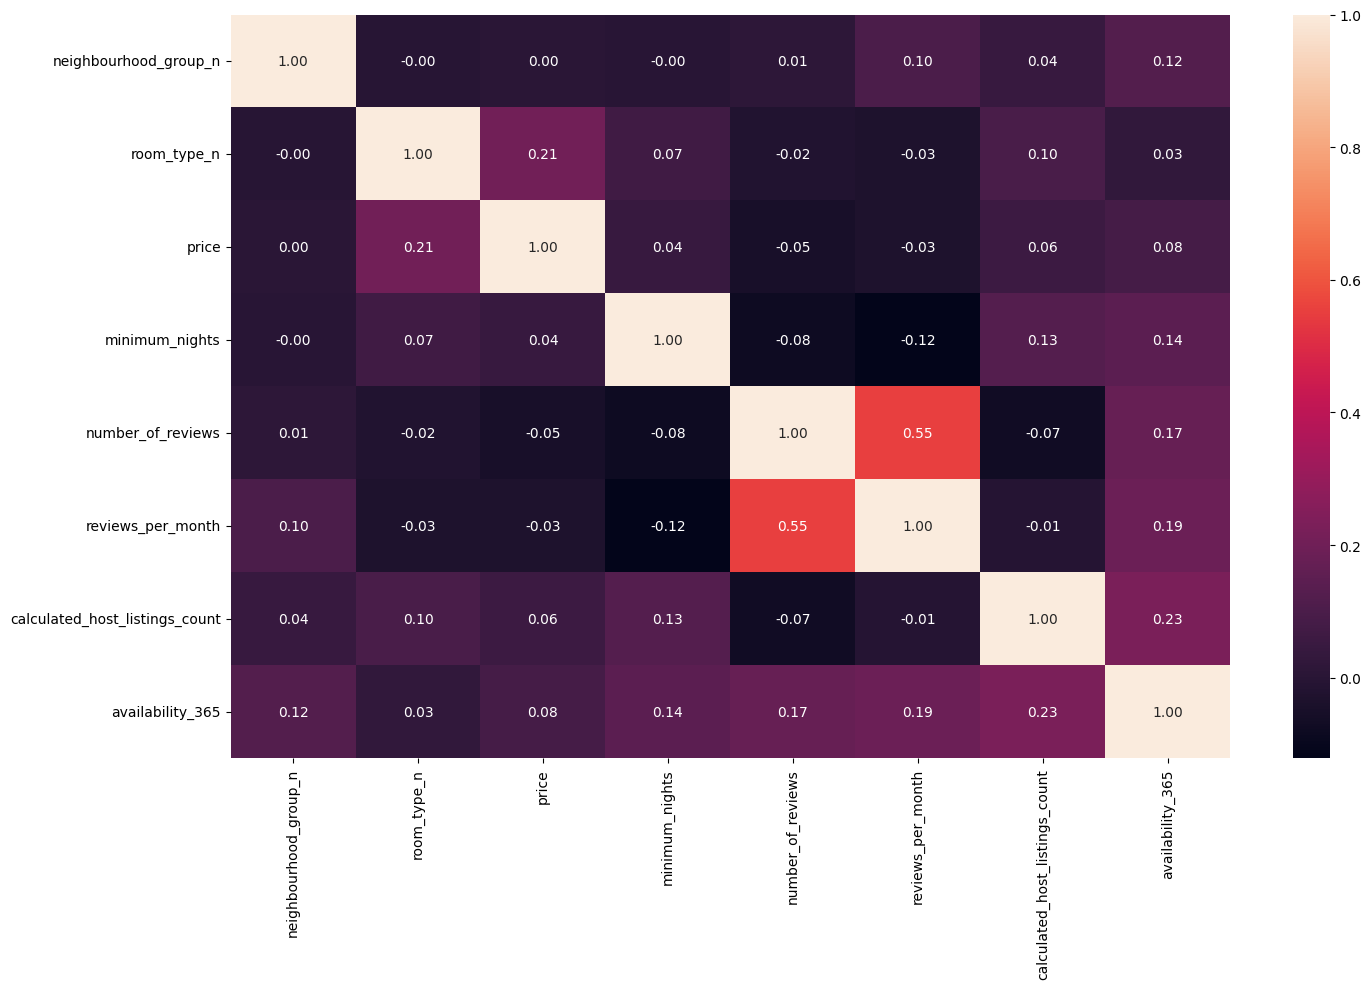

In [42]:
# ANÁLISIS NUMÉRICO - CATEGÓRICO COMPLETO
# Codificando las variables categóricas a números enteros para su procesamiento
df_imp["neighbourhood_group_n"] = pd.factorize(df_imp["neighbourhood_group"])[0]
df_imp["room_type_n"] = pd.factorize(df_imp["room_type"])[0]

fig, axis = plt.subplots(figsize = (15, 10))

sns.heatmap(df_imp[["neighbourhood_group_n", "room_type_n", "price", "minimum_nights", "number_of_reviews",
                    "reviews_per_month", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Muy baja correlación entre variables, las únicas quizás a destacar son las siguientes:  
- `reviews_per_month` vs `number_of_reviews`, parece lógico ya que propiedades con mayor cantidad de reseñas tendrán mayor cantidad de reseñas por mes.
- la variable objetivo `price` con quien guarda mayor relación es con `room_type`, lo cual tiene sentido ya que según que tipo de propiedad sea la que se renta se afectará en mayor o menor medida el precio.
- por último `calculated_host_listings_count` y `availability_365` guardan algo de relación entre ellas lo cual podría indicar que propietarios con mas inmuebles tendrían mayor disponibilidad de los mismos a lo largo del año.

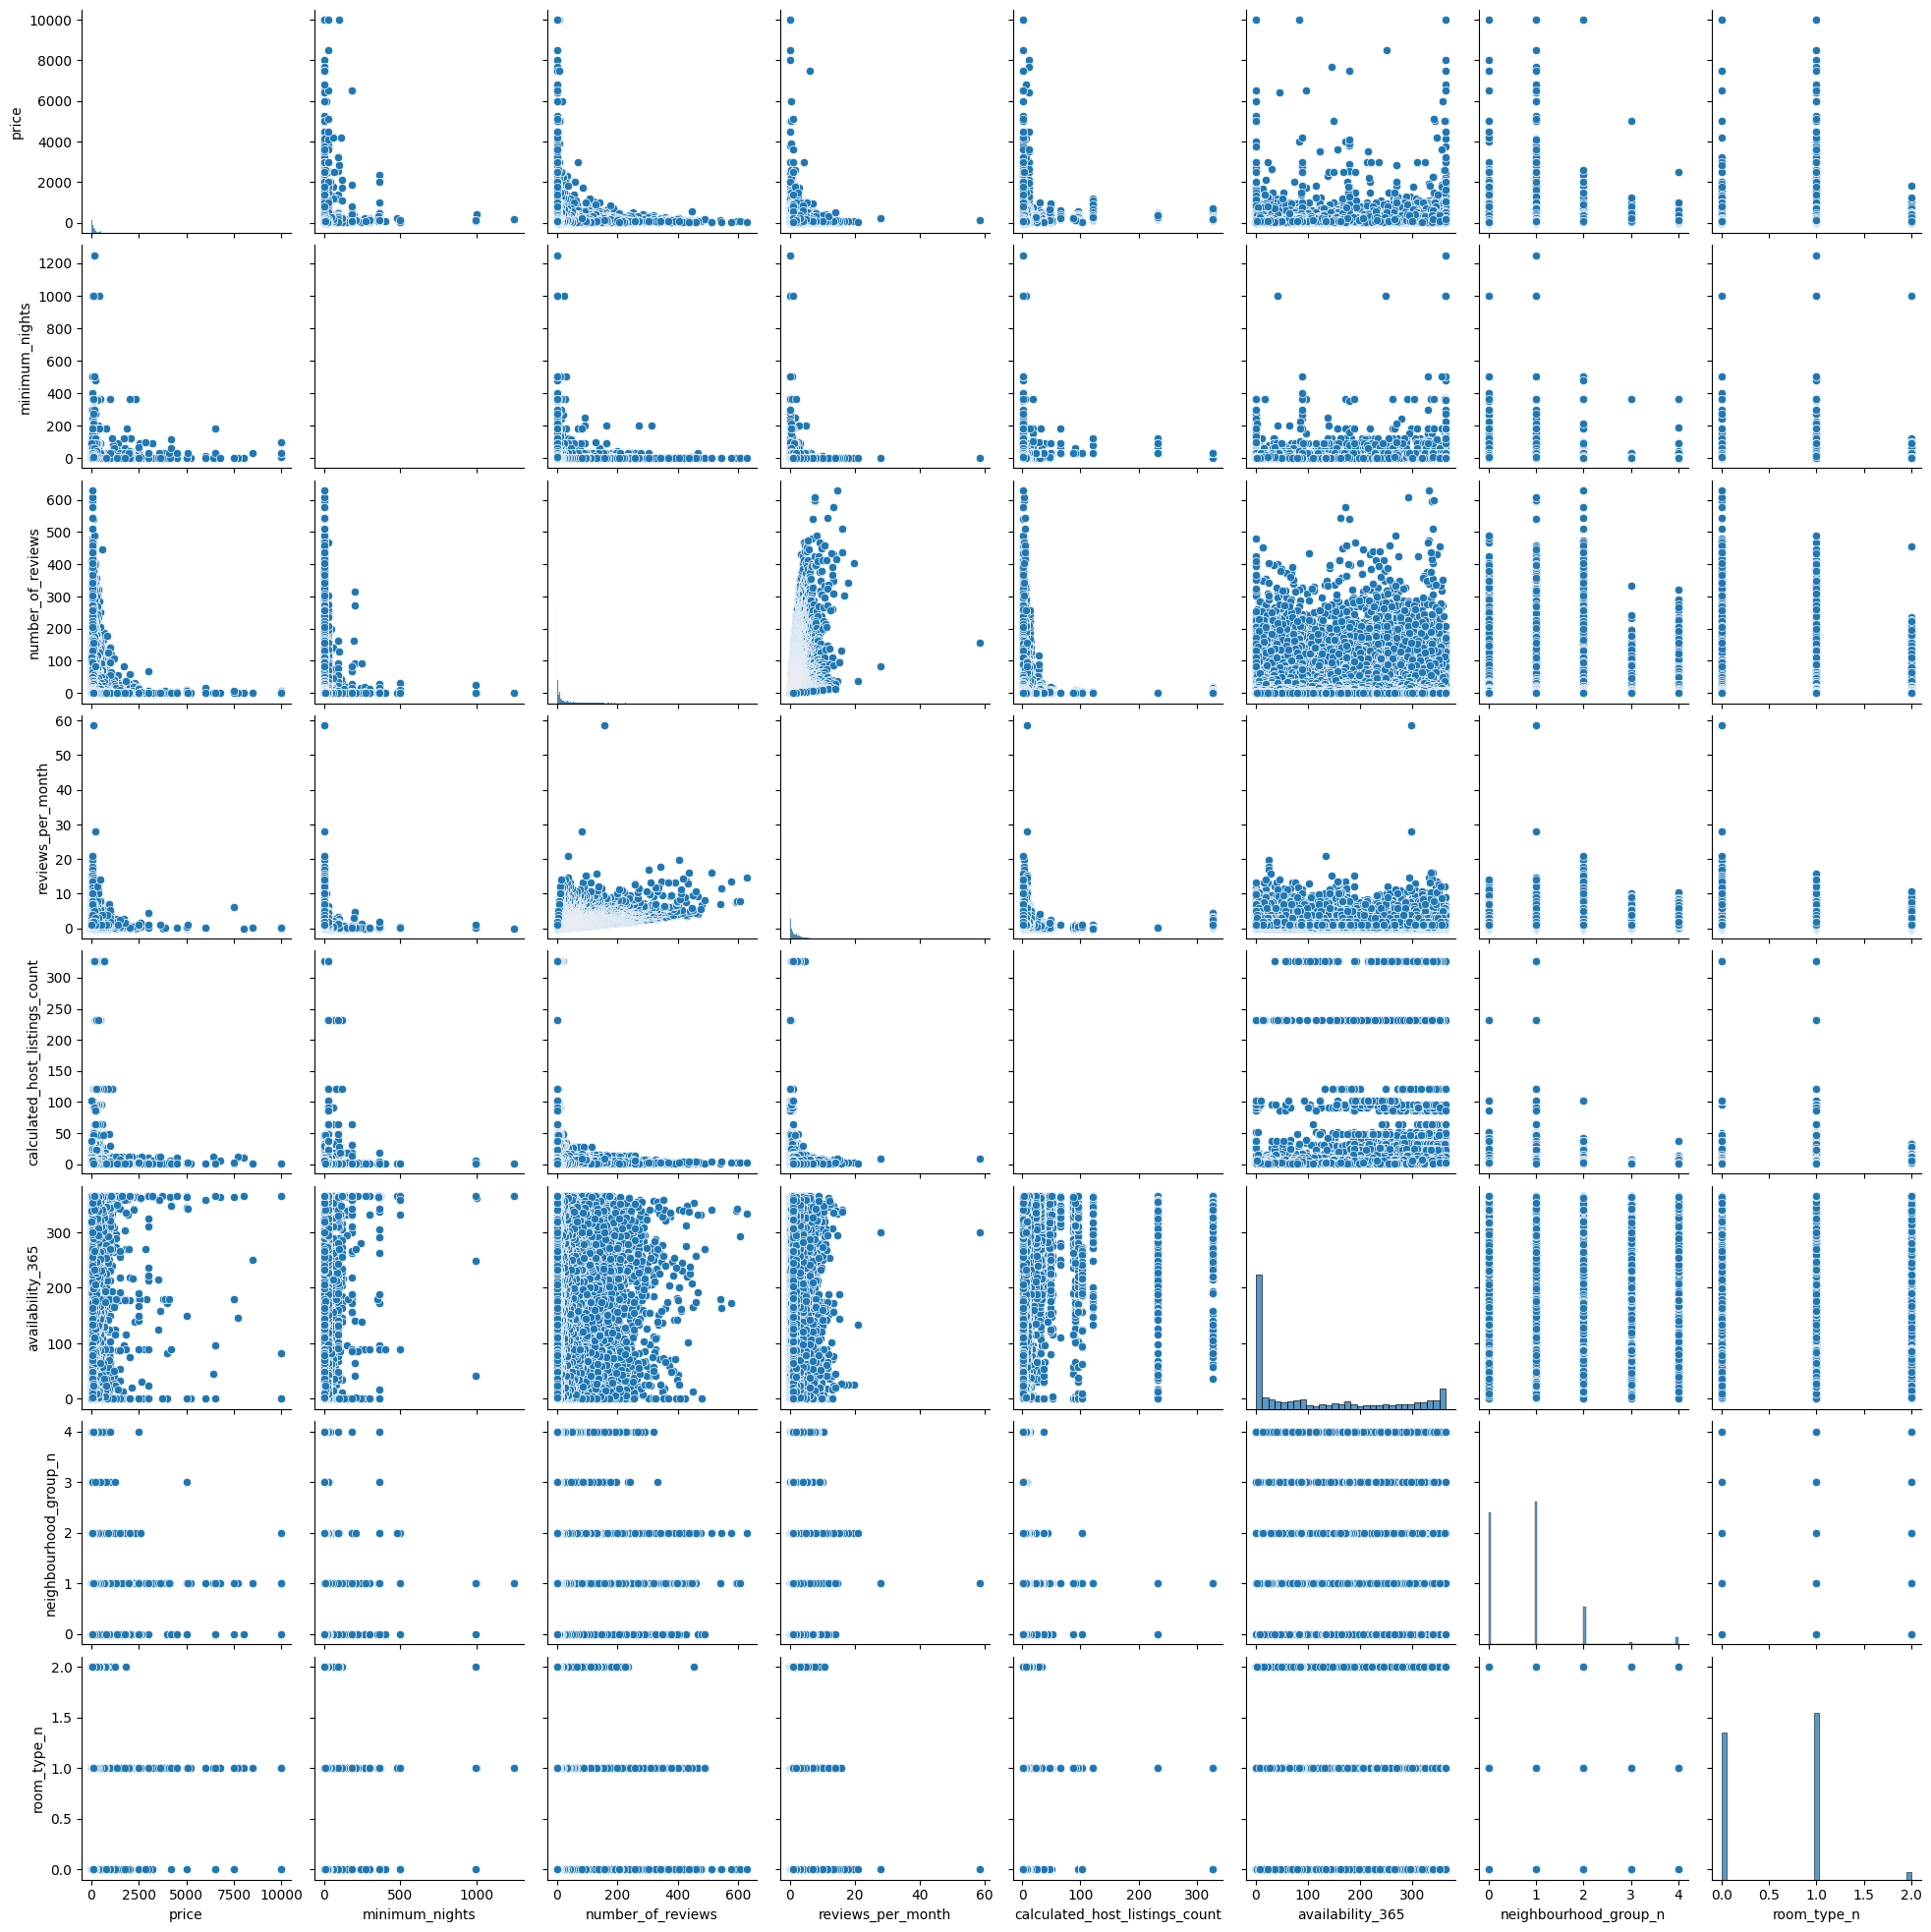

In [43]:
# RELACIONES TODOS CON TODOS
sns.pairplot(data = df_imp)
plt.show()

Para las variables numéricas, es necesario realizar una limpieza de valores atípicos, en la medida de lo posible. Las variables afectadas por estos outliers son ``price``, ``minimum_nights``, ``number_of_reviews``, ``reviews_per_month`` y ``calculated_host_listings_count``.

Algunas de estas pueden reflejar comportamientos válidos, como alojamientos muy populares o empresas con múltiples propiedades en la plataforma, por tanto se tendrá cuidado de no eliminarlas sin análisis, y alguna que represente muchos datos de la muestra se valorará de forma independiente.

In [44]:
# LIMPIEZA DE VALORES ATIPICOS
# "price"
# rango intercuartílico
price_info = df_imp["price"].describe()
price_iqr = price_info["75%"] - price_info["25%"]
up_limit = price_info["75%"] + 3 * price_iqr
low_limit = price_info["25%"] - 3 * price_iqr

# Eliminamos solo los datos que contengan precio = 0, los valores atipicos grandes pueden ser informacion correcta
df_imp = df_imp[df_imp["price"] != 0]

In [45]:
# minimum_nights
# rango intercuartílico
min_nights_info = df_imp["minimum_nights"].describe()
min_nights_iqr = min_nights_info["75%"] - min_nights_info["25%"]
up_limit = min_nights_info["75%"] + 3 * min_nights_iqr
low_limit = min_nights_info["25%"] - 3 * min_nights_iqr

# A pesar de tener un limite superior en 17 para esta variable, se considera eliminar los datos cuyo valor de noches minimas sea > 30
# Esto puede representar estancias mínimas extremadamente largas que no se ajustan al uso habitual de la plataforma
df_imp = df_imp[df_imp["minimum_nights"] <= 30]

In [46]:
# number_of_reviews
# rango intercuartílico
reviews_info = df_imp["number_of_reviews"].describe()
reviews_iqr = reviews_info["75%"] - reviews_info["25%"]
up_limit = reviews_info["75%"] + 3 * reviews_iqr
low_limit = reviews_info["25%"] - 3 * reviews_iqr

# Se decide no eliminar las entradas que sobrepasen el limite superior calculado porque puede representar propiedades muy populares y ser un dato correcto

In [47]:
# reviews_per_month
# rango intercuartílico
reviews_month_info = df_imp["reviews_per_month"].describe()
reviews_month_iqr = reviews_month_info["75%"] - reviews_month_info["25%"]
up_limit = reviews_month_info["75%"] + 3 * reviews_month_iqr
low_limit = reviews_month_info["25%"] - 3 * reviews_month_iqr

# Se decide eliminar las entradas correspondientes a valores por encima del limite en las reseñas mensuales, ya que representan pocos datos dentro de la muestra
# y pueden deberse a datos erroneos o manipulados
df_imp = df_imp.drop(df_imp[df_imp["reviews_per_month"] > up_limit].index) #No quiero eliminar los NaN todavia por eso no uso mascara booleana

In [48]:
# calculated_host_listings_count
# rango intercuartílico
host_list_info = df_imp["calculated_host_listings_count"].describe()
host_list_iqr = host_list_info["75%"] - host_list_info["25%"]
up_limit = host_list_info["75%"] + 3 * host_list_iqr
low_limit = host_list_info["25%"] - 3 * host_list_iqr

# Gran cantidad de datos por encima de up_limit en calculated_host_listings_count, ademas podria representar grandes empresas presentes y ser un dato relevante
# Se decide no eliminar los valores atipicos

In [49]:
# Comparacion de shape en el dataset previo y luego de la eliminacion de valores atipicos
prev_shape = 48895
actual_shape = df_imp.shape[0]

print(f"Tamaño anterior a la limpieza: {prev_shape}, actual: {actual_shape}, se ha eliminado un {100*(1-actual_shape/prev_shape):.2f}% de los datos lo cual es admisible")

Tamaño anterior a la limpieza: 48895, actual: 47832, se ha eliminado un 2.17% de los datos lo cual es admisible


In [50]:
# TRATAMIENTO DE VALORES FALTANTES
df_imp.isnull().sum().sort_values(ascending=False)
# La propiedad "reviews_per_month" tiene un numero muy alto de valores NaN (9743), lo cual es un porcentaje muy alto y
# no se recomienda eliminar

shape_na = df_imp[df_imp["reviews_per_month"].isna()].shape
shape_na_and_0 = df_imp[(df_imp["reviews_per_month"].isna()) & (df_imp["number_of_reviews"] == 0)].shape

print(f"reviews_per_month = NaN: {shape_na[0]}\nreviews_per_month = NaN and number_of_reviews = 0: {shape_na_and_0[0]}")

# Se decide rellenar todos los valores donde "reviews_per_month" tienen NaN por 0, ya que en todos esos casos la cantidad total
# de reviews de esa propiedad es 0, por tanto tiene sentido que su promedio de reseñas mensuales sea 0 tambien
df_imp['reviews_per_month'] = df_imp['reviews_per_month'].fillna(0)

df_imp.isnull().sum().sort_values(ascending=False)

reviews_per_month = NaN: 9743
reviews_per_month = NaN and number_of_reviews = 0: 9743


neighbourhood_group               0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_group_n             0
room_type_n                       0
dtype: int64

In [51]:
# CODIFICACION Y ESCALAMIENTO
# Decido separar mis datos en train y test antes de codificar o hacer alguna otra transformacion
# Luego aplicare de igual manera los metodos a ambos dataframes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Elimino las columnas que habia creado antes con pd.factorize
df_imp = df_imp.drop(["neighbourhood_group_n", "room_type_n"], axis=1)

X = df_imp.drop("price", axis = 1)
y = df_imp["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [53]:
X_train_coded = X_train.copy()
X_test_coded = X_test.copy()

# instancio el encoder
label_encoder_neig_group = LabelEncoder()
label_encoder_room = LabelEncoder()

# entreno el encoder con los datos de entrenamiento
label_encoder_neig_group.fit(X_train["neighbourhood_group"])
label_encoder_room.fit(X_train["room_type"])

# aplico el encoder en ambos
X_train_coded["neighbourhood_group"] = label_encoder_neig_group.transform(X_train['neighbourhood_group'])
X_train_coded["room_type"] = label_encoder_room.transform(X_train['room_type'])

X_test_coded["neighbourhood_group"] = label_encoder_neig_group.transform(X_test['neighbourhood_group'])
X_test_coded["room_type"] = label_encoder_room.transform(X_test['room_type'])

X_train_coded.head()

,neighbourhood_group,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
30583,2,0,1,8,0.53,17,267
16542,1,0,4,13,0.36,2,0
41853,3,1,30,0,0.00,10,340
42283,2,0,2,12,3.16,1,32
26911,0,1,3,9,0.43,2,322


In [54]:
# Escalado
from sklearn.preprocessing import MinMaxScaler

# instancio el escalador
scaler = MinMaxScaler()

# entreno el escalador con los datos de entrenamiento
scaler.fit(X_train_coded)

# aplico el escalador en ambos
X_train_scal = scaler.transform(X_train_coded)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train_coded.index, columns = X_train_coded.columns)

X_test_scal = scaler.transform(X_test_coded)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test_coded.index, columns = X_test_coded.columns)

X_train_scal.head()

,neighbourhood_group,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
30583,0.50,0.0,0.000000,0.013468,0.069829,0.049080,0.731507
16542,0.25,0.0,0.103448,0.021886,0.047431,0.003067,0.000000
41853,0.75,0.5,1.000000,0.000000,0.000000,0.027607,0.931507
42283,0.50,0.0,0.034483,0.020202,0.416337,0.000000,0.087671
26911,0.00,0.5,0.068966,0.015152,0.056653,0.003067,0.882192


In [55]:
from sklearn.feature_selection import chi2, SelectKBest

selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_scal), columns = X_train_scal.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scal), columns = X_test_scal.columns.values[ix])

X_train_sel.head()

,room_type,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
0,0.0,0.000000,0.069829,0.049080,0.731507
1,0.0,0.103448,0.047431,0.003067,0.000000
2,0.5,1.000000,0.000000,0.027607,0.931507
3,0.0,0.034483,0.416337,0.000000,0.087671
4,0.5,0.068966,0.056653,0.003067,0.882192


DATASET DE ENTRENAMIENTO Y DE PRUEBA CODIFICADOS EN SUS VARIABLES CATEGÓRICAS, ESCALADO Y SELECCIONADO SUS 5 CARACTERÍSTICAS FUNDAMENTALES PARA EL MODELO PREDICTIVO